In [6]:
import urllib2, cStringIO
import json
from PIL import Image
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

import urllib, simplejson
import requests
import StringIO
import time

from dateutil import parser, rrule
from datetime import datetime, time, date
import io
import cv2

In [2]:
url = 'http://data.surrey.ca/api/action/datastore_search?resource_id=18b8fdab-bbb4-41c7-9f1a-37794cb1b883'
json_obj = urllib2.urlopen(url)
data = json.load(json_obj)

In [3]:
print data['result']['records']

[{u'IMAGE': u'http://cosmos.surrey.ca/TrafficCameraImages/enc_colebrook_kgbv_cam1.jpg', u'LONGITUDE': u'-122.8180491', u'LOCATION': u'Colebrook Rd And King George Blvd', u'LATITUDE': u'49.09401236', u'ROTATION': None, u'_id': 1}, {u'IMAGE': u'http://cosmos.surrey.ca/TrafficCameraImages/enc_cres_kgbv_cam1.jpg', u'LONGITUDE': u'-122.8206532', u'LOCATION': u'Crescent Rd And King George Blvd', u'LATITUDE': u'49.06760453', u'ROTATION': None, u'_id': 2}, {u'IMAGE': u'http://cosmos.surrey.ca/TrafficCameraImages/enc_fraser_140_cam1.jpg', u'LONGITUDE': u'-122.8341435', u'LOCATION': u'Fraser Hwy And 140 St', u'LATITUDE': u'49.17862983', u'ROTATION': None, u'_id': 3}, {u'IMAGE': u'http://cosmos.surrey.ca/TrafficCameraImages/enc_fraser_152_cam1.jpg', u'LONGITUDE': u'-122.8012502', u'LOCATION': u'Fraser Hwy And 152 St', u'LATITUDE': u'49.16589869', u'ROTATION': None, u'_id': 4}, {u'IMAGE': u'http://cosmos.surrey.ca/TrafficCameraImages/enc_fraser_152_cam2.jpg', u'LONGITUDE': u'-122.8005787', u'LOCAT

In [4]:
data = pd.read_json(json.dumps(data['result']['records']), orient='records')
data.drop(['_id','ROTATION'], axis=1, inplace = True)

In [5]:
data

,IMAGE,LATITUDE,LOCATION,LONGITUDE
0,http://cosmos.surrey.ca/TrafficCameraImages/en...,49.094012,Colebrook Rd And King George Blvd,-122.818049
1,http://cosmos.surrey.ca/TrafficCameraImages/en...,49.067605,Crescent Rd And King George Blvd,-122.820653
2,http://cosmos.surrey.ca/TrafficCameraImages/en...,49.178630,Fraser Hwy And 140 St,-122.834143
3,http://cosmos.surrey.ca/TrafficCameraImages/en...,49.165899,Fraser Hwy And 152 St,-122.801250
4,http://cosmos.surrey.ca/TrafficCameraImages/en...,49.165643,Fraser Hwy And 152 St,-122.800579
5,http://cosmos.surrey.ca/TrafficCameraImages/en...,49.157169,Fraser Hwy And 160 St,-122.778725
6,http://cosmos.surrey.ca/TrafficCameraImages/en...,49.147886,Fraser Hwy And 168 St,-122.756678
7,http://cosmos.surrey.ca/TrafficCameraImages/en...,49.128825,Fraser Hwy And 184 St,-122.712392
8,http://cosmos.surrey.ca/TrafficCameraImages/en...,49.123513,Fraser Hwy And 188 St,-122.701649
9,http://cosmos.surrey.ca/TrafficCameraImages/en...,49.180617,Fraser Hwy And Whalley Blvd,-122.841139


In [26]:
count = 0
for url in data['IMAGE']:
    count += 1
    urllib.urlretrieve(url, "./images/"+str(count)+".png")

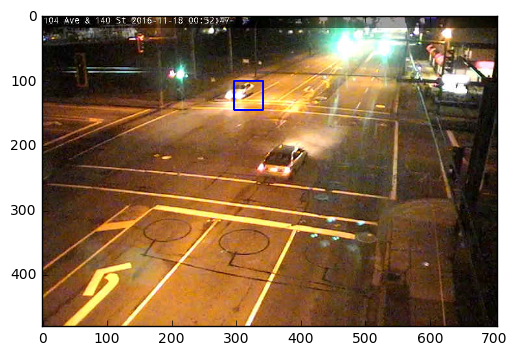

In [52]:
cascade_src = './vehicleDetection/cars.xml'
photo_src = './images/37.png'#37

img = cv2.imread(photo_src)
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
car_cascade = cv2.CascadeClassifier(cascade_src)

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
cars = car_cascade.detectMultiScale(gray, 1.1, 1)

for (x,y,w,h) in cars:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)      
    
plt.imshow(img)


In [26]:
file = cStringIO.StringIO(urllib2.urlopen('http://cosmos.surrey.ca/TrafficCameraImages/enc_cres_kgbv_cam1.jpg').read())
img = Image.open(file)

In [29]:
from IPython.display import Image
from IPython.core.display import HTML 
img = Image(url= 'http://cosmos.surrey.ca/TrafficCameraImages/enc_cres_kgbv_cam1.jpg')

In [3]:
import cv2
import urllib

req = urllib.urlopen('http://answers.opencv.org/upfiles/logo_2.png')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr,-1) # 'load it as it is'
img = cv2.cvtColor(img, cv2.cv.CV_BGR2RGB)

#plt.imshow(img)

/Users/sriraghu95/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


RuntimeError: module compiled against API version 0xa but this version of numpy is 0x7

ImportError: numpy.core.multiarray failed to import